In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
import sys
sys.path.insert(0, 'drive/2D_Image')

In [4]:
!pip install -q keras

In [8]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator



import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




TRAINING_DIR = "drive/2D_Image/Train/"
training_datagen = ImageDataGenerator()

VALIDATION_DIR = "drive/2D_Image/Validation/"
validation_datagen = ImageDataGenerator()

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,target_size=(250,250),class_mode='categorical',batch_size=32)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,target_size=(250,250),class_mode='categorical',batch_size=32)


model= Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(250, 250, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

history = model.fit(train_generator, epochs=20, steps_per_epoch=10, validation_data = validation_generator, verbose = 1, validation_steps=3)



Found 392 images belonging to 7 classes.
Found 168 images belonging to 7 classes.
Epoch 1/20
10/10 [==============================] - 253s 25s/step - loss: 13.0161 - accuracy: 0.1419 - val_loss: 1.8859 - val_accuracy: 0.1667
Epoch 2/20
10/10 [==============================] - 53s 5s/step - loss: 1.8855 - accuracy: 0.2601 - val_loss: 1.8418 - val_accuracy: 0.1562
Epoch 3/20
10/10 [==============================] - 11s 1s/step - loss: 1.7741 - accuracy: 0.2973 - val_loss: 1.6998 - val_accuracy: 0.3750
Epoch 4/20
10/10 [==============================] - 4s 445ms/step - loss: 1.5428 - accuracy: 0.3514 - val_loss: 1.3210 - val_accuracy: 0.4688
Epoch 5/20
10/10 [==============================] - 3s 307ms/step - loss: 1.2313 - accuracy: 0.4875 - val_loss: 1.0618 - val_accuracy: 0.5417
Epoch 6/20
10/10 [==============================] - 2s 185ms/step - loss: 1.0099 - accuracy: 0.5608 - val_loss: 0.9684 - val_accuracy: 0.4896
Epoch 7/20
10/10 [==============================] - 2s 185ms/step - l

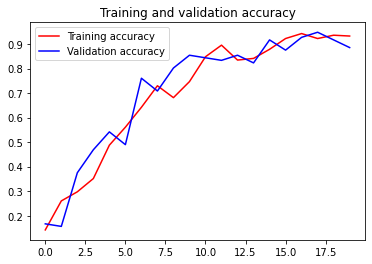

<Figure size 432x288 with 0 Axes>

In [9]:
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [10]:
TEST_DIR = "drive/2D_Image/Test/"
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow_from_directory(
    directory=TEST_DIR,
    target_size=(250, 250),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)


Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)


print('Classification Report')
target_names = ['circle', 'poly3', 'poly5', 'poly7', 'rect', 'star5', 'star8']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Found 140 images belonging to 7 classes.
Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[17  0  0  0  0  0  0]
 [ 0 19  0  0  0  1  0]
 [ 0  0 19  5  0  0  0]
 [ 4  0  1 18  0  0  0]
 [ 0  0  0  0 15  0  0]
 [ 0  0  0  0  0 17  0]
 [ 0  0  0  0  0  0 24]]
Classification Report
              precision    recall  f1-score   support

      circle       0.81      1.00      0.89        17
       poly3       1.00      0.95      0.97        20
       poly5       0.95      0.79      0.86        24
       poly7       0.78      0.78      0.78        23
        rect       1.00      1.00      1.00        15
       star5       0.94      1.00      0.97        17
       star8       1.00      1.00      1.00        24

    accuracy                           0.92       140
   macro avg       0.93      0.93      0.93       140
weighted avg       0.93      0.92      0.92       140

